In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(12323233)

In [3]:
mean_val1=np.array([0,0,0])
co_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_val1,co_mat1,100)


In [4]:
mean_val2=np.array([1,1,1])
co_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_val2,co_mat2,100)


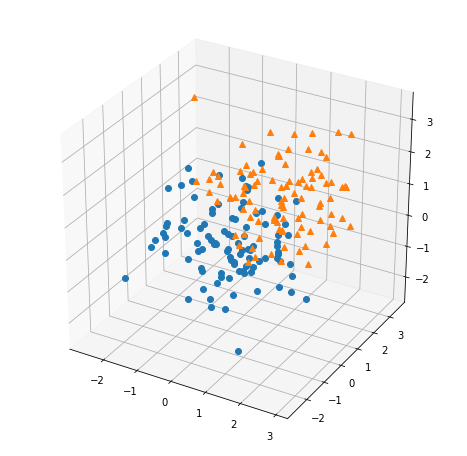

In [5]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')
plt.show()

In [6]:
all_data=np.concatenate((class1,class2))

In [7]:
pca=PCA(n_components=2)
transform_data=pca.fit_transform(all_data)
transform_data

array([[ 0.96190916, -1.08786319],
       [ 0.4527254 , -0.92539886],
       [ 1.13269442,  0.73914591],
       [ 1.82161859,  1.3311487 ],
       [ 1.17090504, -0.47548681],
       [ 1.5162952 , -0.83384367],
       [ 2.33377437,  0.51488898],
       [ 1.31951233,  0.42741035],
       [ 2.21956662, -1.53200142],
       [-0.0161678 , -3.05688555],
       [ 1.63264146, -1.0485359 ],
       [ 1.62787532, -0.70586153],
       [ 1.25258277, -0.20435512],
       [ 2.68656985,  0.19591354],
       [ 1.31520577,  2.7610543 ],
       [ 2.34253481,  0.05025819],
       [-0.26458593, -1.33284817],
       [ 1.39862701,  1.10258868],
       [ 0.80063827,  0.22972103],
       [ 0.47477882, -2.12473936],
       [ 0.16815484,  0.48757549],
       [ 1.23182806,  0.25516954],
       [-0.34214916, -1.10087955],
       [-1.04177772,  1.02604024],
       [ 0.49585198,  0.73675233],
       [ 0.3892384 ,  0.98781207],
       [ 0.56613305, -0.78465   ],
       [ 1.28917184,  0.64985804],
       [ 1.62050622,

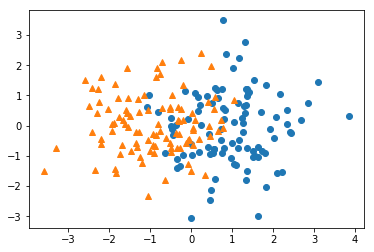

In [8]:
plt.plot(transform_data[0:100,0],transform_data[0:100,1],"o")
plt.plot(transform_data[100:200,0],transform_data[100:200,1],"^")
plt.show()

In [9]:
pca.components_

array([[-0.53288161, -0.52143014, -0.66644415],
       [-0.04757975,  0.80479981, -0.59163623]])

In [10]:
#inverse transformation
x_inverse=pca.inverse_transform(transform_data)
x_inverse

array([[ 0.08642002, -0.82783734,  0.61951873],
       [ 0.35002468, -0.43158232,  0.86274148],
       [-0.09151693,  0.55348666, -0.57522489],
       [-0.48679929,  0.67070457, -1.38460467],
       [-0.05408675, -0.4439737 ,  0.11793059],
       [-0.22108829, -0.91247607,  0.09976425],
       [-0.72088026, -0.25327456, -1.24299907],
       [-0.17623646,  0.20518945, -0.51529454],
       [-0.56263053, -1.84106021,  0.04412854],
       [ 0.70130483, -1.90250736,  2.43629736],
       [-0.27287207, -1.14592678,  0.14924566],
       [-0.28663664, -0.8676573 , -0.05031654],
       [-0.11051169, -0.26835619, -0.09691439],
       [-0.89370171, -0.69394413, -1.28940012],
       [-0.28497576,  2.08555123, -1.89309277],
       [-0.70344153, -0.63177729, -0.97394501],
       [ 0.75165303, -0.3854697 ,  1.58185119],
       [-0.25052003,  0.70732006, -0.96748002],
       [ 0.10966799,  0.3166457 , -0.0525338 ],
       [ 0.39533713, -1.40831065,  1.5576174 ],
       [ 0.43443813,  0.85396284,  0.216

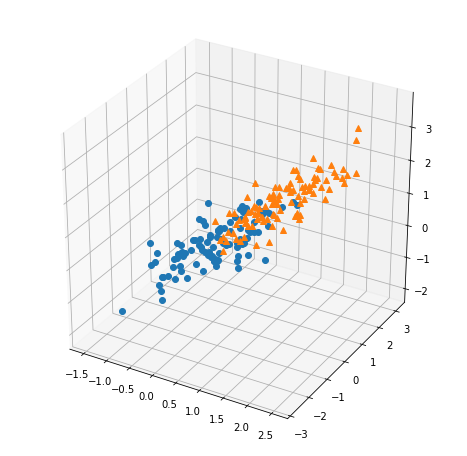

In [11]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(x_inverse[0:100,0],x_inverse[0:100,1],x_inverse[0:100,2],'o')
ax.plot(x_inverse[100:200,0],x_inverse[100:200,1],x_inverse[100:200,2],'^')
plt.show()

In [16]:
#implement your own pca
all_data_t=all_data.T
cov=np.cov(all_data_t)
cov

array([[1.1394703 , 0.23710918, 0.32370981],
       [0.23710918, 1.30168353, 0.1817758 ],
       [0.32370981, 0.1817758 , 1.37527173]])

In [21]:
eig_value,eig_vect=np.linalg.eig(cov)
eig_value,eig_vect

(array([1.77632916, 0.88606044, 1.15403596]),
 array([[ 0.53288161,  0.84485109,  0.04757975],
        [ 0.52143014, -0.28356283, -0.80479981],
        [ 0.66644415, -0.45367253,  0.59163623]]))

In [26]:
value_vect=[]
for i in range(len(eig_value)):
    eig_vector=eig_vect[:,i];
    value_vect.append((eig_value[i],eig_vector))
value_vect.sort(reverse=True)

In [27]:
value_vect

[(1.776329163392163, array([0.53288161, 0.52143014, 0.66644415])),
 (1.1540359592157294, array([ 0.04757975, -0.80479981,  0.59163623])),
 (0.8860604444527993, array([ 0.84485109, -0.28356283, -0.45367253]))]

In [32]:
pca.explained_variance_

array([1.77632916, 1.15403596])